In [1]:
import pandas as pd
import numpy as np 
import datetime as dt 
import matplotlib.pyplot as plt 
import seaborn as sns  

In [2]:
df = pd.read_csv("Online Retail.csv")

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [4]:
df['InvoiceNo'].nunique()

25900

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [6]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# Correcting data types
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format='%m/%d/%y %H:%M')
print(df['InvoiceDate'].dtype)

datetime64[ns]


In [8]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category')

In [9]:
# Checking Typo Errors
Countries = df.Country.unique()
print(Countries)

['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany', ..., 'Brazil', 'USA', 'European Community', 'Malta', 'RSA']
Length: 38
Categories (38, object): ['Australia', 'Austria', 'Bahrain', 'Belgium', ..., 'USA', 'United Arab Emirates', 'United Kingdom', 'Unspecified']


Here is a typo error in `Country` 'USA' and 'RSA'

In [10]:
df['Country'] = df['Country'].replace('RSA','USA') 

In [11]:
# Check the negative values in 'UnitPrice'
df[df['UnitPrice'] < 0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


In [12]:
df[df['StockCode'] == 'B']  

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


It seems there is no consistency in the `UnitPrice` values across rows

In [13]:
df['UnitPrice'] = df['UnitPrice'].abs()

In [14]:
# Handling duplicates
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


**Duplicates** maybe occur due to various reasons: 
* Legitimate reasons, such as repeated transactions or multiple entries for the same product in different orders.
* Order Confirmation or Cancellation more than once 
* Data Entry Errors

So, I am not going to remove it "It maybe occurs due to multiple entries for the same product"

In [15]:
# Handling missing values
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [16]:
df[df['Description'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,2010-12-01 14:32:00,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,2010-12-01 14:33:00,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,2010-12-01 14:34:00,0.0,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
535322,581199,84581,NaN,-2,2011-12-07 18:26:00,0.0,NaN,United Kingdom
535326,581203,23406,NaN,15,2011-12-07 18:31:00,0.0,NaN,United Kingdom
535332,581209,21620,NaN,6,2011-12-07 18:35:00,0.0,NaN,United Kingdom
536981,581234,72817,NaN,27,2011-12-08 10:33:00,0.0,NaN,United Kingdom


In [17]:
df[df['Description'].isnull()]['UnitPrice'].sum()

0.0

Missing values in `Description` column have the same missing values in `CustomerID` column where `UnitPrice` equals 0.0 

Could impute `Description` column based on the releatd value in `StockCode`. But the total missing values here are small 

In [18]:
df.dropna(subset=['Description'],inplace=True)

In [19]:
df[df['CustomerID'].isnull()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


Missing values in column `CustomerID` may be occur for various reasons, such as guest checkouts, incomplete data, or orders from non-registered customers. 

Total missing values are so big to remove. So, assgin a placeholder value `Guest` is a suitable solution.

In [20]:
df['CustomerID'].fillna('Guest',inplace=True)

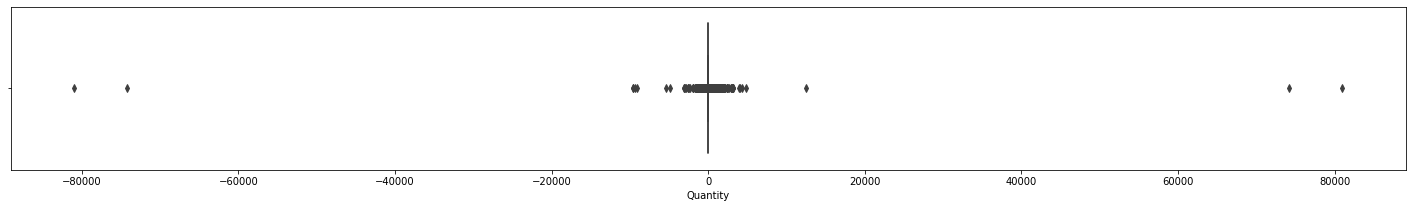

In [21]:
# Dealing with Outliers
# Identify and handle outliers in the dataset.
plt.figure(figsize=(25,3))
sns.boxplot(x=df['Quantity'])
plt.show() 

In [22]:
Q1 = df['Quantity'].quantile(.25)
Q3 = df['Quantity'].quantile(.75)

IQR = Q3 - Q1 

outliers = (df['Quantity'] < Q1 - 1.5 * IQR) | (df['Quantity'] > Q3 + 1.5 * IQR)
df_outliers = df[outliers]
df_outliers

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
30,536370,21883,STARS GIFT TAPE,24,2010-12-01 08:45:00,0.65,12583.0,France
31,536370,10002,INFLATABLE POLITICAL GLOBE,48,2010-12-01 08:45:00,0.85,12583.0,France
...,...,...,...,...,...,...,...,...
541876,581585,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,24,2011-12-09 12:31:00,0.85,15804.0,United Kingdom
541882,581585,21916,SET 12 RETRO WHITE CHALK STICKS,24,2011-12-09 12:31:00,0.42,15804.0,United Kingdom
541883,581585,84692,BOX OF 24 COCKTAIL PARASOLS,25,2011-12-09 12:31:00,0.42,15804.0,United Kingdom
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom


In [23]:
neg_Quantity = df[df["Quantity"] < 0].sort_values('Quantity',ascending=True)
neg_Quantity

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,Guest,United Kingdom
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.00,Guest,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
...,...,...,...,...,...,...,...,...
240697,C558112,22796,PHOTO FRAME 3 CLASSIC HANGING,-1,2011-06-26 16:08:00,9.95,17114.0,United Kingdom
240696,C558112,23091,ZINC HERB GARDEN CONTAINER,-1,2011-06-26 16:08:00,6.25,17114.0,United Kingdom
240694,C558112,82486,WOOD S/3 CABINET ANT WHITE FINISH,-1,2011-06-26 16:08:00,8.95,17114.0,United Kingdom
241869,C558253,22741,FUNKY DIVA PEN,-1,2011-06-27 17:04:00,0.85,13611.0,United Kingdom


In [24]:
df[df['CustomerID'] == 16446.0]


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
194354,553573,22980,PANTRY SCRUBBING BRUSH,1,2011-05-18 09:52:00,1.65,16446.0,United Kingdom
194355,553573,22982,PANTRY PASTRY BRUSH,1,2011-05-18 09:52:00,1.25,16446.0,United Kingdom
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,2011-12-09 09:15:00,2.08,16446.0,United Kingdom
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom


`Negative quantities` could be due to various reasons such as **returns/refunds** and **cancellations**.

**returns/refunds** occurs when the value of `InvoiceNo` starts with **C**. Otherwise maybe **cancellations** for the order

Separating negative `Quantity` values into a separate columns. To distinguish between regular purchases, returns and cancel.

In [25]:
# Returns/Refund
neg_Quantity[neg_Quantity['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,2011-12-09 09:27:00,2.08,16446.0,United Kingdom
61624,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,-74215,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
4287,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,-9360,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
160145,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,-3114,2011-04-18 13:08:00,2.10,15749.0,United Kingdom
160144,C550456,21175,GIN + TONIC DIET METAL SIGN,-2000,2011-04-18 13:08:00,1.85,15749.0,United Kingdom
...,...,...,...,...,...,...,...,...
240697,C558112,22796,PHOTO FRAME 3 CLASSIC HANGING,-1,2011-06-26 16:08:00,9.95,17114.0,United Kingdom
240696,C558112,23091,ZINC HERB GARDEN CONTAINER,-1,2011-06-26 16:08:00,6.25,17114.0,United Kingdom
240694,C558112,82486,WOOD S/3 CABINET ANT WHITE FINISH,-1,2011-06-26 16:08:00,8.95,17114.0,United Kingdom
241869,C558253,22741,FUNKY DIVA PEN,-1,2011-06-27 17:04:00,0.85,13611.0,United Kingdom


In [26]:
# Cancellation
neg_Quantity[~neg_Quantity['InvoiceNo'].str.startswith('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
225529,556690,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.0,Guest,United Kingdom
225530,556691,23005,printing smudges/thrown away,-9600,2011-06-14 10:37:00,0.0,Guest,United Kingdom
225528,556687,23003,Printing smudges/thrown away,-9058,2011-06-14 10:36:00,0.0,Guest,United Kingdom
115818,546152,72140F,throw away,-5368,2011-03-09 17:25:00,0.0,Guest,United Kingdom
431381,573596,79323W,"Unsaleable, destroyed.",-4830,2011-10-31 15:17:00,0.0,Guest,United Kingdom
...,...,...,...,...,...,...,...,...
154799,549948,37488A,damaged,-1,2011-04-13 12:55:00,0.0,Guest,United Kingdom
156618,550153,85167B,DAMAGED,-1,2011-04-14 14:44:00,0.0,Guest,United Kingdom
355331,567918,79163,damaged,-1,2011-09-22 17:20:00,0.0,Guest,United Kingdom
212679,555503,84313C,damaged,-1,2011-06-03 15:39:00,0.0,Guest,United Kingdom


In [27]:
# Create a new columns for returns and cancellation 
df['Returns'] = df.apply( lambda row: row['Quantity'] if row['Quantity'] < 0 and row['InvoiceNo'].startswith('C') else 0, axis=1)
df['Cancel']  = df.apply( lambda row: row['Quantity'] if row['Quantity'] < 0 and not row['InvoiceNo'].startswith('C') else 0, axis=1) 

In [28]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']

In [29]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Returns,Cancel,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,0,0,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,0,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,0,0,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,0,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,0,0,20.34


In [30]:
df.to_csv('Online Retail Dataset')

### Product Level Analysis

In [31]:
# Frequency distribution of Sales Products and highlight the most popular ones
Products = df[df['Quantity'] > 0].groupby('StockCode')['Quantity'].agg(['count'])

In [32]:
Popular_Product = Products[Products['count'] > 1000]

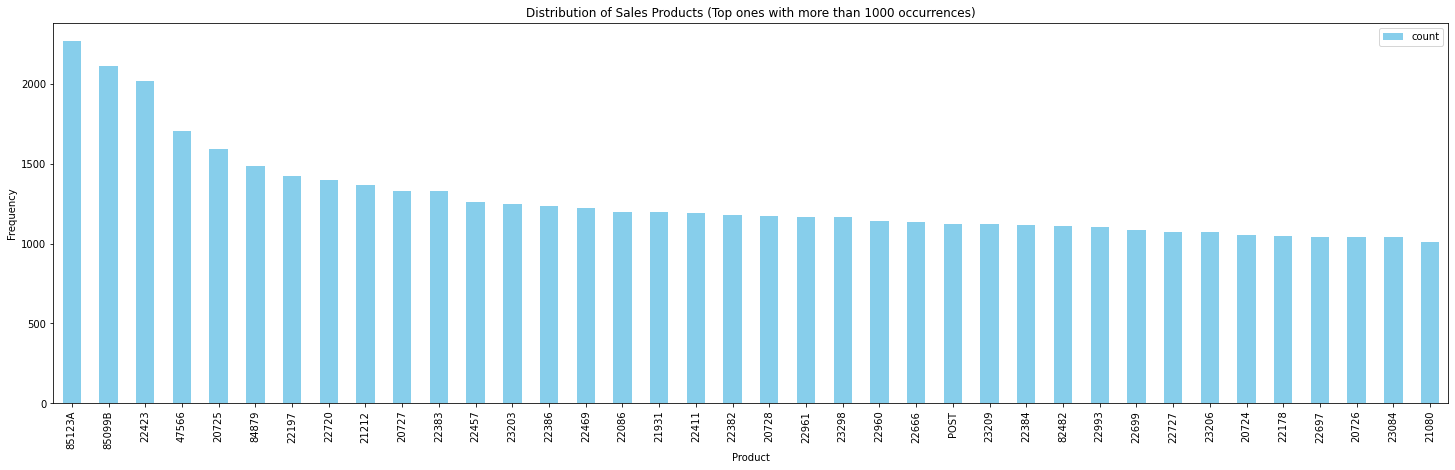

In [33]:
Popular_Product.sort_values('count',ascending=False).plot(figsize=(25,7), kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title('Distribution of Sales Products (Top ones with more than 1000 occurrences)')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.show()

In [34]:
Returns_Product = df[df['Returns'] != 0].groupby('StockCode')['Returns'].agg(['count'])

In [35]:
Popular_Returns_Product = Returns_Product[Returns_Product['count'] > 50]

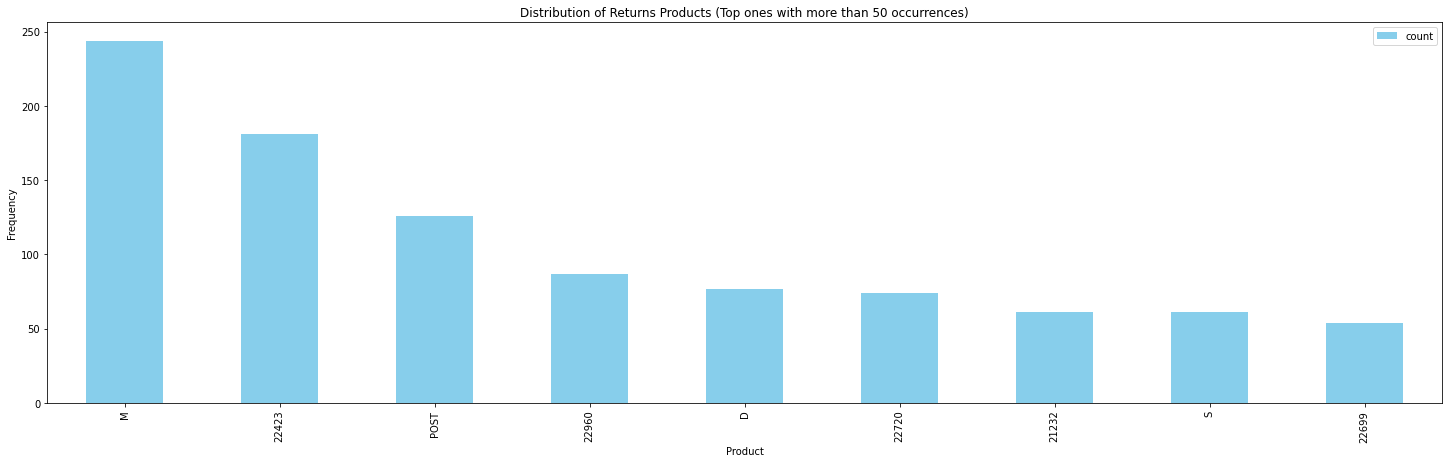

In [36]:
Popular_Returns_Product.sort_values('count',ascending=False).plot(figsize=(25,7), kind='bar', color='skyblue')
plt.xticks(rotation=90)
plt.title('Distribution of Returns Products (Top ones with more than 50 occurrences)')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.show()

### Demand Curve 

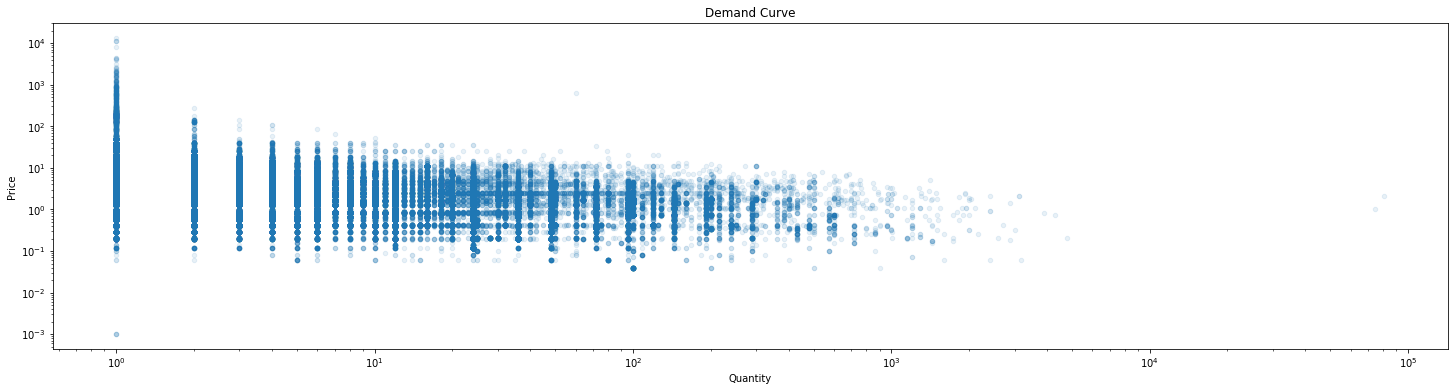

In [37]:
demand_data = df[(df['UnitPrice'] > 0) & (df['Quantity'] > 0)][['UnitPrice','Quantity']]
demand_data.plot(figsize=(25,6), x='Quantity', y='UnitPrice', kind='scatter', loglog=True, alpha=.1)
plt.title('Demand Curve')
plt.xlabel('Quantity')
plt.ylabel('Price')
plt.show()

Negative relationship between `UnitPrice` and `Quantity`

### Analyzing Sales by Country

In [38]:
agg_country_data = (df.groupby('Country')['Revenue'].agg(['sum','count','mean','median','std'])).reset_index() 
agg_country_data.head()

,Country,sum,count,mean,median,std
0,Australia,137077.27,1259,108.877895,51.84,159.010963
1,Austria,10154.32,401,25.322494,17.00,34.579338
2,Bahrain,548.40,19,28.863158,25.50,73.816333
3,Belgium,40910.96,2069,19.773301,16.60,15.583858
4,Brazil,1143.60,32,35.737500,19.65,32.896282


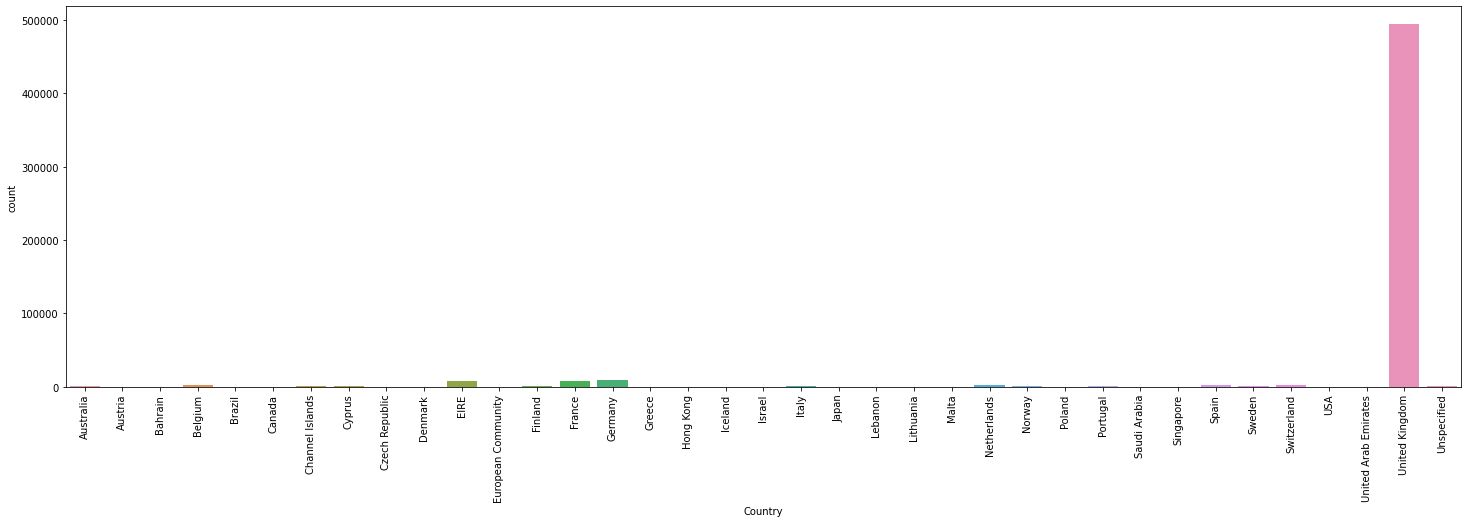

In [39]:
plt.figure(figsize=(25,7))
sns.barplot(x=agg_country_data['Country'],y=agg_country_data['count'])
plt.xticks(rotation=90)
plt.show()

Need to exclude `United Kingdom` from visualization due to significant sales differences.

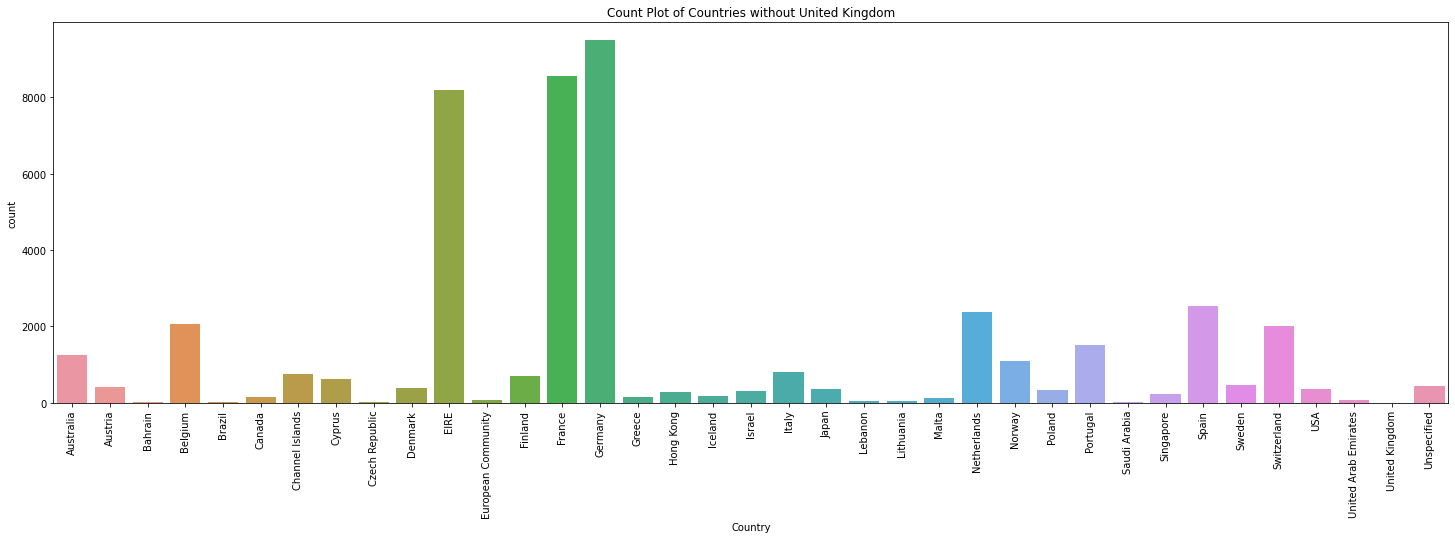

In [40]:
plt.figure(figsize=(25,7))
sns.barplot(data = agg_country_data[agg_country_data['Country'] != 'United Kingdom'], x='Country',y='count')
plt.title('Count Plot of Countries without United Kingdom')
plt.xticks(rotation=90)
plt.show()

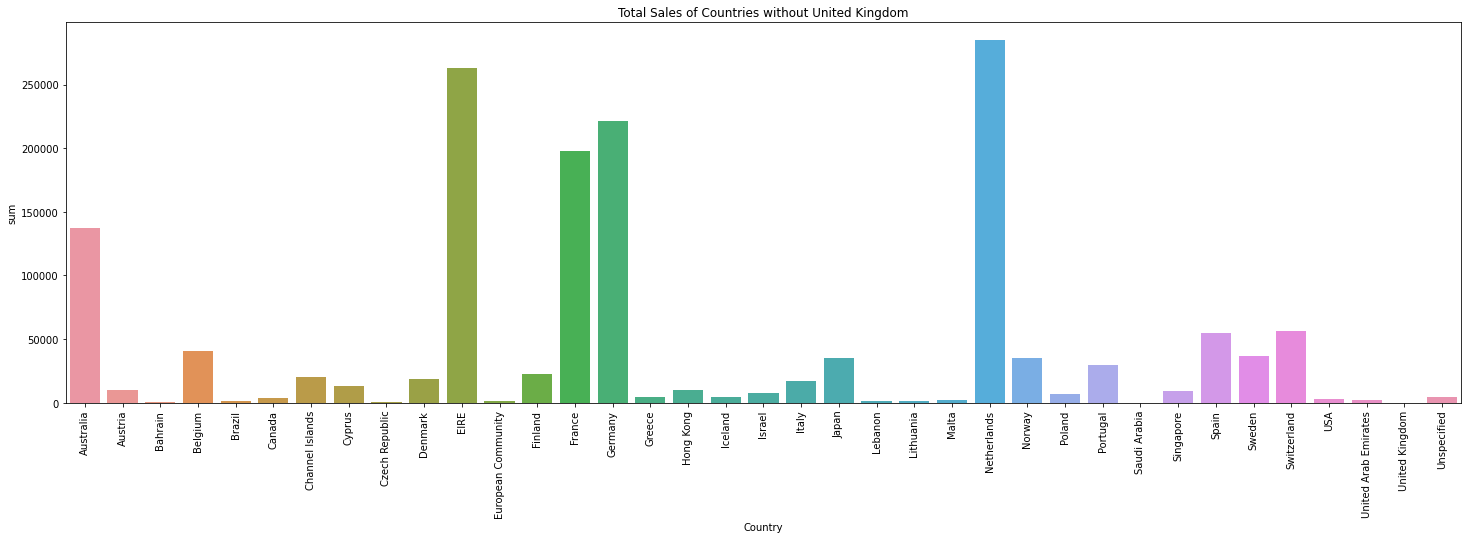

In [41]:
plt.figure(figsize=(25,7))
sns.barplot(data = agg_country_data[agg_country_data['Country'] != 'United Kingdom'], x='Country',y='sum')
plt.title('Total Sales of Countries without United Kingdom')
plt.xticks(rotation=90)
plt.show()

Highest sales were in Europe meanwhile Latin America, Asia, and Africa were lowest sales

### Customer Segmentation

* Identifying High-Value Segments
* Tailoring Marketing and Retention Strategies
* Optimizing Resource Allocation

`RFM analysis` is effective for segmenting customers based on their **recency of purchase**, **frequency of transactions**, and **monetary value**. It provides actionable insights for tailoring marketing, retention, and loyalty programs. It helps identify high-value segments that can be targeted for personalized marketing strategies.

In [42]:
# To perform RFM analysis. First, need to remove null values in CustomerID these are here as a 'Guest'
new_df = df.copy()
new_df = new_df[new_df['CustomerID'] != 'Guest'][['CustomerID','InvoiceDate','Revenue']]
new_df.head()

,CustomerID,InvoiceDate,Revenue
0,17850.0,2010-12-01 08:26:00,15.30
1,17850.0,2010-12-01 08:26:00,20.34
2,17850.0,2010-12-01 08:26:00,22.00
3,17850.0,2010-12-01 08:26:00,20.34
4,17850.0,2010-12-01 08:26:00,20.34


In [43]:
new_df.CustomerID.nunique()

4372

In [44]:
# Recency Calculation based on customer last transaction date

# Maximum date in dataset 
max_date = new_df['InvoiceDate'].max()

# Calculate recency for each customer
recency_df = new_df.groupby('CustomerID')['InvoiceDate'].max().reset_index() 
recency_df['Recency'] = (max_date - recency_df['InvoiceDate']).dt.days

In [45]:
recency_df.head()

,CustomerID,InvoiceDate,Recency
0,12346.0,2011-01-18 10:17:00,325
1,12347.0,2011-12-07 15:52:00,1
2,12348.0,2011-09-25 13:13:00,74
3,12349.0,2011-11-21 09:51:00,18
4,12350.0,2011-02-02 16:01:00,309


In [46]:
# Frequency Calculation based on transaction of each customer

freq_df = new_df.groupby('CustomerID')['InvoiceDate'].nunique().reset_index()
freq_df.rename(columns={'InvoiceDate':'Frequency'},inplace=True)
freq_df

,CustomerID,Frequency
0,12346.0,2
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4367,18280.0,1
4368,18281.0,1
4369,18282.0,3
4370,18283.0,16


In [47]:
# Monetary Value Calculation of transaction for each customer

monetary_df = new_df.groupby('CustomerID')['Revenue'].sum().reset_index()
monetary_df.rename(columns={'Revenue':'Monetary'},inplace=True)
monetary_df

,CustomerID,Monetary
0,12346.0,0.00
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40
...,...,...
4367,18280.0,180.60
4368,18281.0,80.82
4369,18282.0,176.60
4370,18283.0,2094.88


In [48]:
# Combine RFM dataframe
rfm_df = recency_df[['CustomerID','Recency']].merge(freq_df,on='CustomerID').merge(monetary_df,on='CustomerID')
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,2,0.00
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


Quantile-based discretization function.

Discretize variable into equal-sized buckets based on rank or based on sample quantiles. For example 1000 values for 10 quantiles would produce a Categorical object indicating quantile membership for each data point.

In [49]:
rfm_df['R'] = pd.qcut(rfm_df['Recency'],5,labels=[5,4,3,2,1])
rfm_df['F'] = pd.qcut(rfm_df['Frequency'].rank(method='first'),5,labels=[1,2,3,4,5])
rfm_df['M'] = pd.qcut(rfm_df['Monetary'],5,labels=[1,2,3,4,5])

In [50]:
rfm_df.sample(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M
983,13659.0,196,3,1550.85,1,3,4
720,13295.0,359,2,197.95,1,2,1
3553,17163.0,21,2,293.10,4,3,2
1752,14711.0,9,12,2838.20,5,5,5
221,12616.0,84,5,657.25,2,4,3
2313,15472.0,112,1,371.56,2,1,2
340,12759.0,51,3,1531.44,3,3,4
3606,17238.0,2,17,3744.65,5,5,5
772,13359.0,58,2,431.26,3,2,2
3947,17703.0,34,3,798.74,3,3,3


In [51]:
rfm_df['RFM_Score'] = rfm_df['R'].astype(str) + rfm_df['F'].astype(str) + rfm_df['M'].astype(str) 

In [52]:
rfm_df.head()

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score
0,12346.0,325,2,0.00,1,2,1,121
1,12347.0,1,7,4310.00,5,4,5,545
2,12348.0,74,4,1797.24,2,3,4,234
3,12349.0,18,1,1757.55,4,1,4,414
4,12350.0,309,1,334.40,1,1,2,112


In [53]:
rfm_df['RFM_Score'].unique()

array(['121', '545', '234', '414', '112', '354', '111', '114', '435',
       '315', '524', '335', '555', '223', '544', '132', '511', '345',
       '324', '413', '532', '124', '215', '233', '445', '144', '433',
       '122', '213', '412', '244', '455', '325', '314', '322', '214',
       '344', '355', '245', '133', '343', '313', '443', '554', '113',
       '312', '243', '225', '425', '411', '221', '432', '321', '533',
       '513', '534', '232', '125', '441', '422', '224', '434', '334',
       '211', '323', '521', '222', '311', '123', '421', '423', '135',
       '444', '143', '543', '212', '512', '523', '454', '424', '145',
       '453', '522', '131', '535', '333', '142', '254', '332', '342',
       '242', '542', '255', '442', '231', '541', '155', '235', '115',
       '241', '134', '253', '331', '141', '154', '525', '553', '353',
       '531', '431', '152', '515', '252', '153', '341', '451'],
      dtype=object)

In [54]:
Seg_Map = {
    r'51[1-2]':         'New Customers',
    r'[4-5][4-5][4-5]': 'Champions',
    r'[4-5][1-3][3-5]': 'Promising',
    r'[3-5][1-5][1-2]': 'Low Spenders',
    r'[3-5][3-5][3-5]': 'Loyal Customers', 
    r'[3-5][2-3][2-4]': 'Potential Loyalists',
    r'[2-3][1-2][4-5]': 'Need Attention',
    r'[2-3][1-2][1-3]': 'About To Sleep',
    r'[1-2][1-5][2-5]': 'At Risk Customers',
    r'[1-2][1-4][1-2]': 'Hibernating'
}

In [55]:
rfm_df['Segment'] = rfm_df['RFM_Score'].replace(Seg_Map,regex=True)

In [56]:
rfm_df.sample(10)

,CustomerID,Recency,Frequency,Monetary,R,F,M,RFM_Score,Segment
641,13184.0,14,12,1648.79,4,5,4,454,Champions
945,13602.0,64,1,428.89,3,1,2,312,Low Spenders
3353,16883.0,186,2,276.73,1,3,2,132,At Risk Customers
3182,16656.0,21,21,8568.24,4,5,5,455,Champions
1533,14421.0,56,2,813.11,3,2,3,323,Potential Loyalists
682,13242.0,111,3,270.40,2,3,2,232,At Risk Customers
2397,15585.0,176,1,455.30,2,1,2,212,About To Sleep
758,13343.0,172,2,303.93,2,2,2,222,About To Sleep
432,12891.0,185,3,331.00,1,3,2,132,At Risk Customers
4113,17932.0,28,3,1331.57,4,3,4,434,Promising


In [57]:
rfm_df.groupby('Segment')['CustomerID'].agg(['count']).sort_values('count',ascending=False).reset_index()

,Segment,count
0,Champions,976
1,At Risk Customers,915
2,Low Spenders,681
3,Loyal Customers,554
4,Hibernating,414
5,About To Sleep,384
6,Promising,285
7,Potential Loyalists,68
8,Need Attention,61
9,New Customers,34


Number of customers in `Segment` `Hibernating` and `At Risk` are big. We need to send email with a **Discount Vouchers** to activate customers who has high visit frequency but not visiting lately.

In [58]:
rfm_df.to_csv('RFM Dataset')

### Cohort Analysis

* Understanding Customer Behavior Over Time
* Identifying Patterns and Trends
* Event-Driven Insights


`Cohort Analysis` is particularly useful when you want to understand how groups of customers (cohorts) behave over time. It helps analyze the impact of changes, promotions, or events on customer behavior. It helps identify patterns and trends related to customer retention, churn, and engagement.

In [59]:
# To perform Cohort analysis. First, need to remove null values in CustomerID these are here as a 'Guest'
new_df2 = df.copy()
new_df2 = df[df['CustomerID'] != 'Guest'][['CustomerID','InvoiceDate','Revenue']]
new_df2.head()

,CustomerID,InvoiceDate,Revenue
0,17850.0,2010-12-01 08:26:00,15.30
1,17850.0,2010-12-01 08:26:00,20.34
2,17850.0,2010-12-01 08:26:00,22.00
3,17850.0,2010-12-01 08:26:00,20.34
4,17850.0,2010-12-01 08:26:00,20.34


In [60]:
# Extract purchase month from InvoiceDate
new_df2['Purchase_Month'] = new_df2['InvoiceDate'].dt.to_period('M')

In [61]:
new_df2['Purchase_Month'].unique()

<PeriodArray>
['2010-12', '2011-01', '2011-02', '2011-03', '2011-04', '2011-05', '2011-06',
 '2011-07', '2011-08', '2011-09', '2011-10', '2011-11', '2011-12']
Length: 13, dtype: period[M]

In [62]:
# Create an Index column 
unique_month = {
    '2010-12':0, '2011-01':1, '2011-02':2, '2011-03':3, '2011-04':4, '2011-05':5, '2011-06':6,
 '2011-07':7, '2011-08':8, '2011-09':9, '2011-10':10, '2011-11':11, '2011-12':12
}

new_df2['Index'] = new_df2['Purchase_Month'].replace(unique_month)
new_df2.sample(5)

,CustomerID,InvoiceDate,Revenue,Purchase_Month,Index
74360,17180.0,2011-01-27 18:05:00,2.95,2011-01,1
363778,13014.0,2011-09-28 10:02:00,-3.75,2011-09,9
376875,14462.0,2011-10-04 15:55:00,20.23,2011-10,10
300564,16525.0,2011-08-14 11:31:00,61.20,2011-08,8
222216,13533.0,2011-06-10 11:54:00,5.90,2011-06,6


In [63]:
# Create a CohortID assigns to customers based on the month they joined "the minimum `Index` value"
new_df2['CohortID'] = new_df2.groupby('CustomerID')['Index'].transform('min')
new_df2.sample(5)

,CustomerID,InvoiceDate,Revenue,Purchase_Month,Index,CohortID
173940,14245.0,2011-05-04 08:40:00,9.96,2011-05,5,3
235128,14175.0,2011-06-21 14:29:00,15.00,2011-06,6,1
163089,14211.0,2011-04-19 11:19:00,15.00,2011-04,4,2
84417,14475.0,2011-02-08 10:12:00,35.70,2011-02,2,2
232251,15700.0,2011-06-19 15:36:00,5.20,2011-06,6,6


The `transform()` function in pandas is a powerful tool used to perform group-wise operations while retaining the original shape of the DataFrame. It allows you to apply a function to each group of data independently and then broadcast the results back to the original DataFrame.

In [64]:
# Create a Signup month to identify which the first month customer makes purchase  
index_map = {
    0:'2010-12', 1:'2011-01', 2:'2011-02', 3:'2011-03', 4:'2011-04', 5:'2011-05', 6:'2011-06',
 7:'2011-07', 8:'2011-08', 9:'2011-09', 10:'2011-10', 11:'2011-11', 12:'2011-12'
}

new_df2['Signup_Month'] = new_df2['CohortID'].map(index_map)

new_df2.sample(5)

,CustomerID,InvoiceDate,Revenue,Purchase_Month,Index,CohortID,Signup_Month
295660,16053.0,2011-08-09 14:57:00,13.52,2011-08,8,8,2011-08
385902,16809.0,2011-10-09 12:44:00,2.20,2011-10,10,3,2011-03
25145,16873.0,2010-12-10 15:45:00,13.20,2010-12,0,0,2010-12
384214,15005.0,2011-10-07 12:28:00,4.16,2011-10,10,0,2010-12
379925,15837.0,2011-10-06 09:01:00,17.70,2011-10,10,10,2011-10


In [65]:
# Create a column `CohortIndex` to show the difference between `Index` and `CohortID` "Number of months the user stayed as a customer"

new_df2['CohortIndex'] = new_df2['Index'] - new_df2['CohortID'] 
new_df2.sample(5)

,CustomerID,InvoiceDate,Revenue,Purchase_Month,Index,CohortID,Signup_Month,CohortIndex
242379,16928.0,2011-06-28 13:55:00,30.00,2011-06,6,0,2010-12,6
159604,16947.0,2011-04-18 09:38:00,15.00,2011-04,4,4,2011-04,0
71022,16222.0,2011-01-25 13:38:00,2.95,2011-01,1,1,2011-01,0
453619,15031.0,2011-11-09 17:44:00,1.68,2011-11,11,3,2011-03,8
530935,13755.0,2011-12-06 12:26:00,2.95,2011-12,12,10,2011-10,2


In [66]:
# Retention rate analysis for monthly cohorts

# `CohortID` : Index the month when the user made it's first purchase
# `CohortIndex` : Difference between `Purchase Month` and `Signup Month`

Cohort_df = new_df2.groupby(['CohortID','CohortIndex'])['CustomerID'].nunique().reset_index().rename(columns={'CustomerID':'No_of_Customers'})
Cohort_df.head()

,CohortID,CohortIndex,No_of_Customers
0,0,0,948
1,0,1,362
2,0,2,317
3,0,3,367
4,0,4,341


In [67]:
Cohort_df = Cohort_df.pivot_table(index='CohortID',columns='CohortIndex',values='No_of_Customers')

In [68]:
Cohort_df.index = Cohort_df.index.map(index_map)
Cohort_df

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortID,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
Cohort_Size = Cohort_df.iloc[:,0]
Cohort_Size

CohortID
2010-12    948.0
2011-01    421.0
2011-02    380.0
2011-03    440.0
2011-04    299.0
2011-05    279.0
2011-06    235.0
2011-07    191.0
2011-08    167.0
2011-09    298.0
2011-10    352.0
2011-11    321.0
2011-12     41.0
Name: 0, dtype: float64

In [70]:
Cohort_Result = Cohort_df.divide(Cohort_Size, axis = 0)
Cohort_Result

CohortIndex,0,1,2,3,4,5,6,7,8,9,10,11,12
CohortID,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


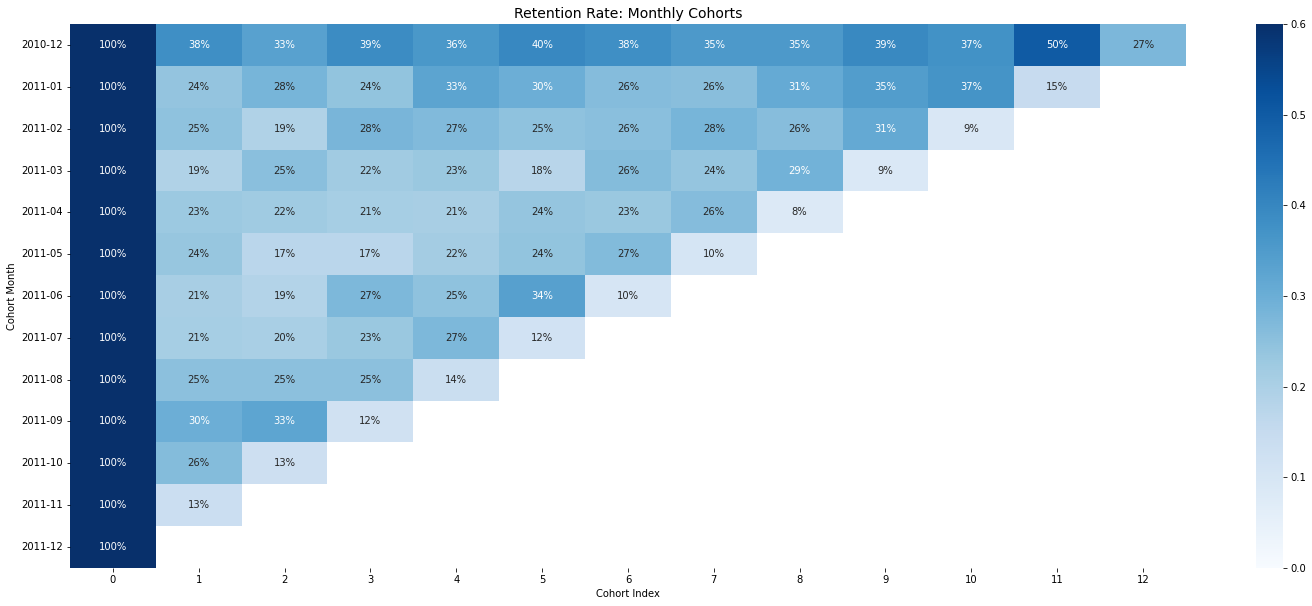

In [71]:
plt.figure(figsize=(25, 10))
sns.heatmap(Cohort_Result, annot=True, fmt= '.0%', cmap='Blues', vmin=0.0 , vmax=0.6)
plt.title('Retention Rate: Monthly Cohorts', fontsize = 14)
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index')
plt.yticks( rotation='360')
plt.show()